In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
src_file = Path.cwd() / 'data' / 'raw' / 'EPA_fuel_economy.csv'
df = pd.read_csv(src_file)
# df.head()

In [3]:
df.head(10)

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
5,BMW,Z3 Roadster,2000,6.0,Automatic 4-spd,2.5,Two Seaters,-1,17.347895,2500,Premium,24,17,19
6,BMW,Z3 Roadster,2000,6.0,Manual 5-spd,2.5,Two Seaters,-1,16.480500,2350,Premium,25,17,20
7,BMW,Z3 Roadster,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
8,BMW,Z3 Roadster,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
9,BMW,Z8,2000,8.0,Manual 6-spd,4.9,Two Seaters,-1,21.974000,3150,Premium,19,12,15


In [ ]:
df['comb08'].plot(kind='hist')

In [ ]:
df['comb08'].plot.hist()

### Plots using .plot() Method

- hist
- line
- box
- kde
- density
- bar
- barh
- area
- scatter
- pie
- hexbin

<AxesSubplot:>

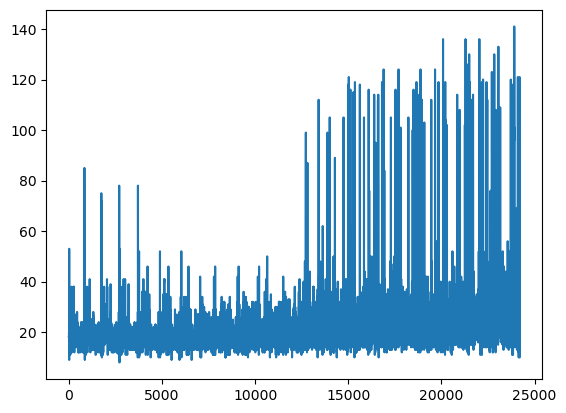

In [4]:
df['comb08'].plot()

<AxesSubplot:>

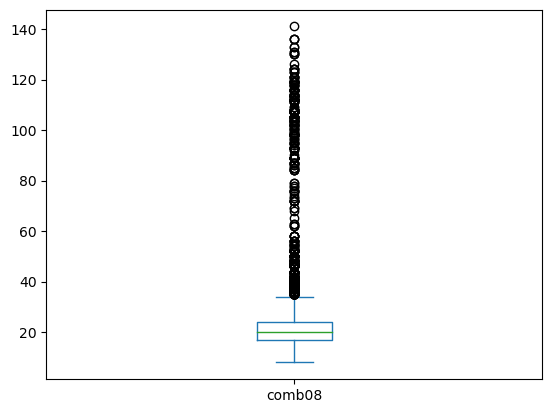

In [5]:
# Box Plot
df['comb08'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

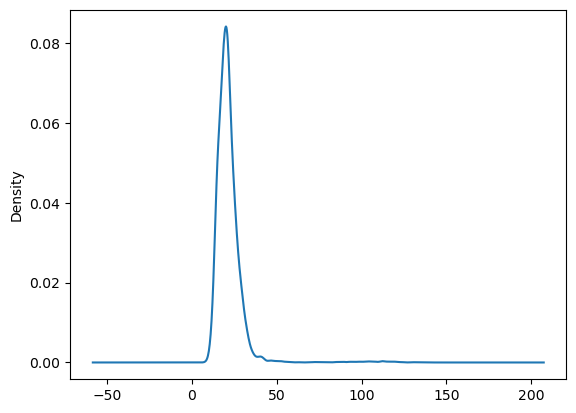

In [6]:
# Probability density using kde and density plots
df['comb08'].plot(kind ='density')

<AxesSubplot:ylabel='Density'>

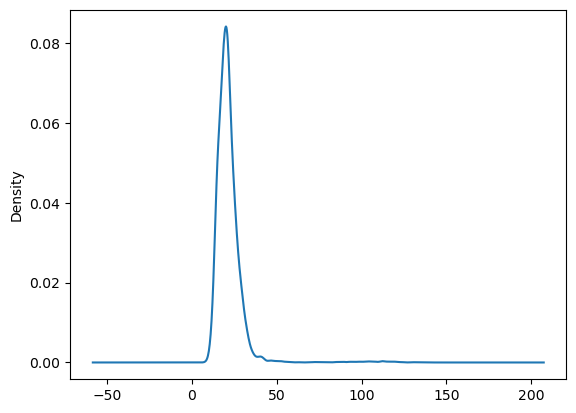

In [7]:
df['comb08'].plot(kind='kde')

In [8]:
 # calculate per year average of highway08, city08 and combined08
avg_per_year = df.groupby(df['year']).agg({'highway08':'mean',
        'city08':'mean','comb08':'mean'}) 
avg_per_year.head(5)


,highway08,city08,comb08
year,,,
2000,23.414286,17.221429,19.526190
2001,23.328211,17.275521,19.479693
2002,23.030769,16.893333,19.168205
2003,22.836207,16.780651,19.000958
2004,23.064171,16.740642,19.067736


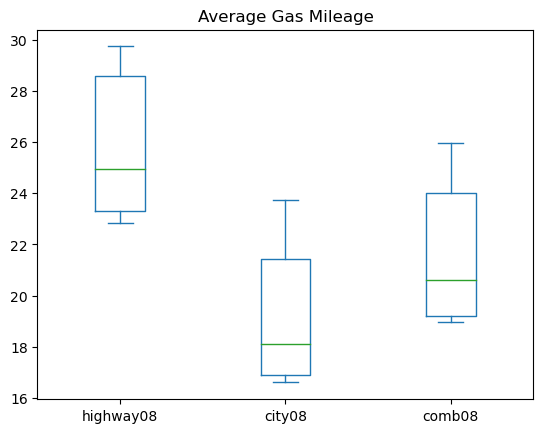

In [9]:
avg_per_year.plot(kind='box', title='Average Gas Mileage');

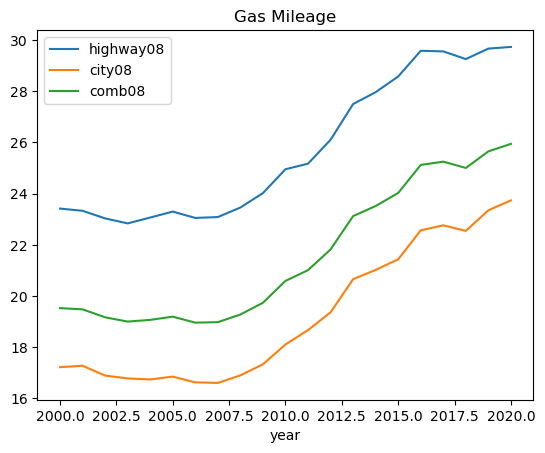

In [10]:
avg_per_year.plot(kind= 'line', title='Gas Mileage');

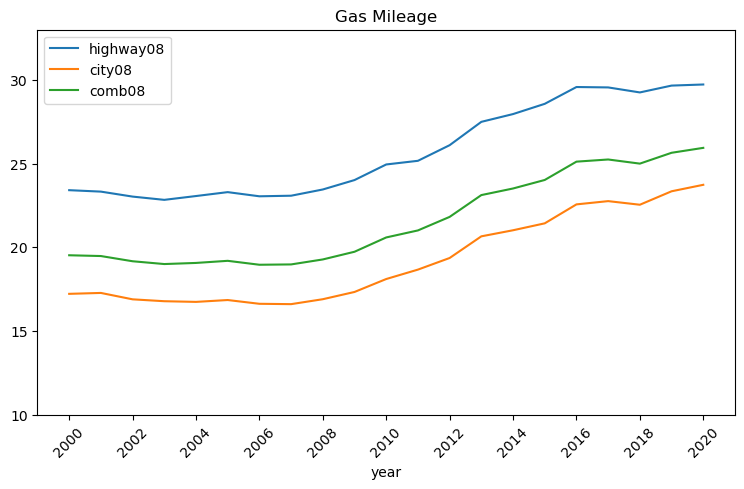

In [11]:
avg_per_year.plot(kind= 'line', title='Gas Mileage', xticks=np.arange(2000,2021,2),
                  figsize=(9,5), ylim=(10,33), rot=45);

In [ ]:
avg_per_year.plot(kind='bar')

In [ ]:
avg_per_year.plot(kind='bar', rot=45)

<AxesSubplot:xlabel='year'>

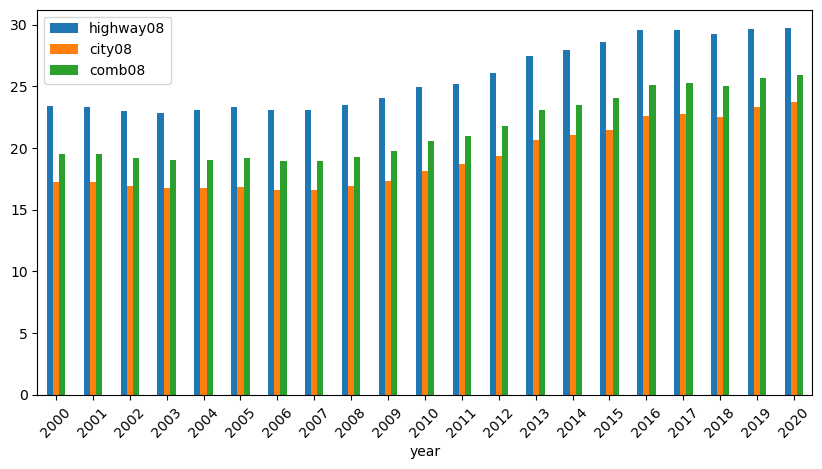

In [12]:
avg_per_year.plot(kind='bar', rot=45, figsize=(10,5))

<AxesSubplot:ylabel='year'>

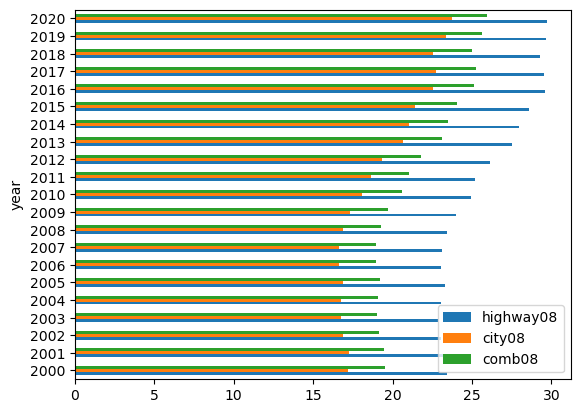

In [13]:
avg_per_year.plot(kind='barh')

In [ ]:
avg_per_year.plot(kind='area')

In [ ]:
avg_per_year.plot(kind='area',stacked=False)

<AxesSubplot:xlabel='year'>

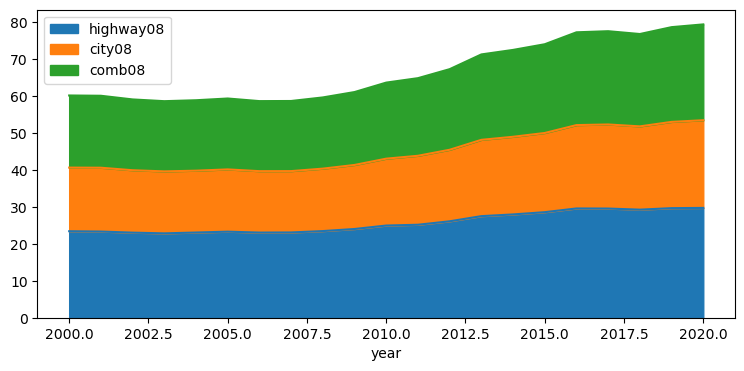

In [14]:
fig, ax = plt.subplots(figsize=(9, 4))
avg_per_year.plot(kind='area', ax=ax)

[Text(0, 0.5, 'MPG'), Text(0.5, 1.0, 'Average MPG by Year')]

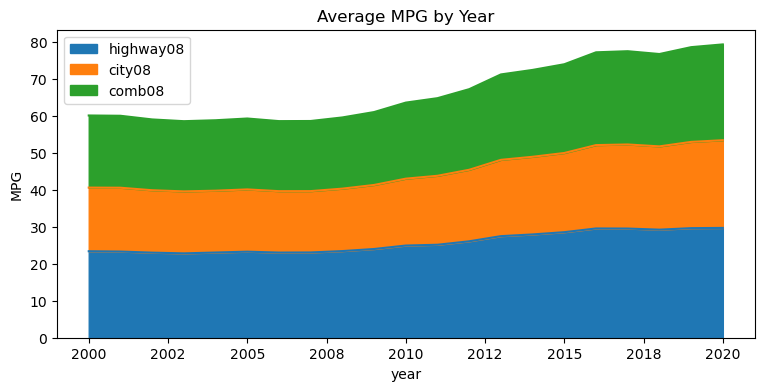

In [16]:
fig, ax1 = plt.subplots(figsize = (9,4))
avg_per_year.plot(kind='area', ax=ax1, stacked=True)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
ax1.set(ylabel='MPG', title = 'Average MPG by Year')

## Histogram and Boxplot

In [ ]:
df[['comb08', 'highway08', 'city08']].plot(kind='hist', 
            alpha=0.45, xlim=(5,60), bins=50)

In [ ]:
df.hist(['highway08','city08'], grid=False)

In [ ]:
df.hist(['highway08','city08'], grid=False, sharex=True)

In [ ]:
df.hist(column=['highway08', 'city08', 'comb08'], 
        figsize=(10,8), layout=(3,1));

In [ ]:
df['fuelType'].value_counts()

In [ ]:
combustion = ['Regular', 'Premium', 'Gasoline or E85', 'Premium or E85', 'Midgrade']
# Passing an array of values to query method of pandas
combustion_df = df.query('fuelType == @combustion').copy()

In [ ]:
combustion_df.head()

In [ ]:
combustion_df.hist(column=['highway08','city08', 'comb08'], 
                   figsize=(10,8), sharey=True, 
                   layout=(3,1));

In [ ]:
combustion_df.hist(column=['highway08', 
         'city08', 'comb08'], figsize=(14, 4), 
                   sharey=True, layout=(1,3));

In [ ]:
combustion_df.boxplot(column=['highway08', 'city08'],
                    by='cylinders', figsize=(10,5))

In [ ]:
combustion_df.boxplot(column=['highway08', 'city08'], 
            by='cylinders', figsize=(10,5), showfliers=False)

In [ ]:
combustion_df.boxplot(column=['highway08', 'city08', 'comb08'], 
                      by='cylinders', figsize=(12,5), layout=(1,3),
                      showfliers=False);

In [ ]:
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates, radviz

In [ ]:
scatter_matrix(df, alpha=0.2, figsize=(12,12));

In [ ]:
df['VClass'].value_counts()

In [ ]:
car_class = ['Compact Cars', 'Midsize Cars', 'Subcompact Cars', 'Large Cars']
car_class_df = df[['cylinders', 'fuelCost08', 'co2', 'VClass']].query('VClass == @car_class').copy()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
andrews_curves(car_class_df, 'VClass', ax=ax1)
ax1.legend(loc='upper left')
parallel_coordinates(car_class_df, 'VClass', ax=ax2)
radviz(car_class_df, 'VClass', ax=ax3, alpha=0.75);